In [10]:
import pandas as pd

# Load the training data
train_data_path = 'Cargo Volume - Train.csv'
train_data = pd.read_csv(train_data_path)

# Display the first few rows of the training data
train_data.head()


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420


In [11]:
# Check for missing values in the dataset
missing_values = train_data.isnull().sum()

missing_values

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    31
Published Airline               0
Published Airline IATA Code    31
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Metric TONS               0
dtype: int64

In [12]:
# Calculate the percentage of missing values for each column with missing data
missing_percentage = (missing_values / len(train_data)) * 100

missing_percentage[missing_percentage > 0]  # Display percentages for columns with missing values

Operating Airline IATA Code    0.113845
Published Airline IATA Code    0.113845
dtype: float64

In [13]:
# Remove rows with missing values
train_data_cleaned = train_data.dropna()

# Feature Engineering: Split 'Activity Period' into 'Year' and 'Month'
train_data_cleaned['Year'] = train_data_cleaned['Activity Period'].apply(lambda x: int(str(x)[:4]))
train_data_cleaned['Month'] = train_data_cleaned['Activity Period'].apply(lambda x: int(str(x)[4:]))

# Now we encode categorical variables using one-hot encoding
categorical_columns = [
    'Operating Airline', 'Operating Airline IATA Code', 'Published Airline',
    'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
    'Activity Type Code', 'Cargo Type Code', 'Cargo Aircraft Type'
]

# Perform one-hot encoding on categorical variables
train_data_encoded = pd.get_dummies(train_data_cleaned, columns=categorical_columns)

# Display the first few rows of the processed data
train_data_encoded.head()

/tmp/ipykernel_476/394598503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Year'] = train_data_cleaned['Activity Period'].apply(lambda x: int(str(x)[:4]))
/tmp/ipykernel_476/394598503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Month'] = train_data_cleaned['Activity Period'].apply(lambda x: int(str(x)[4:]))


,Activity Period,Cargo Metric TONS,Year,Month,Operating Airline_ABX Air,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,...,GEO Region_South America,GEO Region_US,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,201601,8.871509,2016,1,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
1,200811,53.946194,2008,11,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
2,200709,0.043999,2007,9,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,201608,19.023530,2016,8,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,201708,6.951420,2017,8,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prepare the feature matrix (X) and the target variable (y)
X = train_data_encoded.drop(['Cargo Metric TONS', 'Activity Period'], axis=1)
y = train_data_encoded['Cargo Metric TONS']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred = linear_reg.predict(X_valid)

# Evaluate the model
r2 = r2_score(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)

(r2, mae, mse)


(0.48071487957954473, 161.2096914216912, 88331.6164414657)

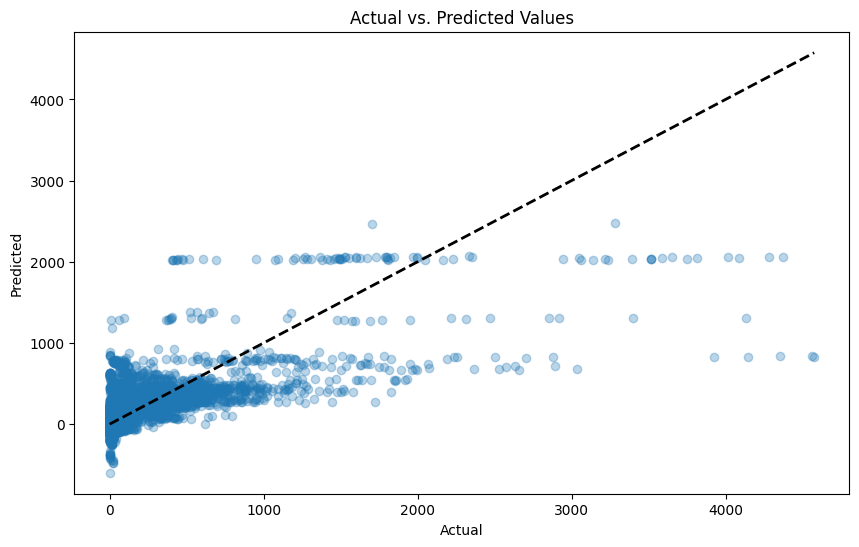

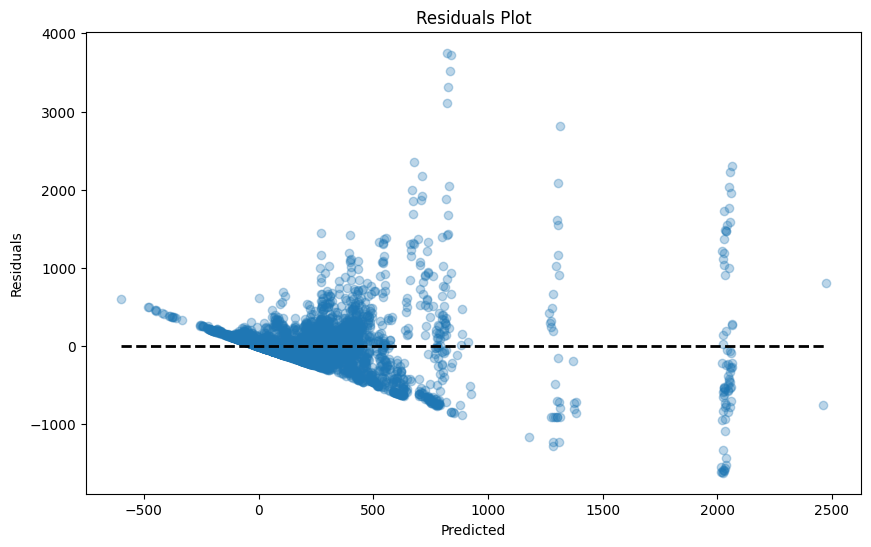

In [15]:
import matplotlib.pyplot as plt

# Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.3)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot Residuals
residuals = y_valid - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], '--k', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the model
random_forest_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = random_forest_reg.predict(X_valid)

# Evaluate the model
r2_rf = r2_score(y_valid, y_pred_rf)
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
mse_rf = mean_squared_error(y_valid, y_pred_rf)

(r2_rf, mae_rf, mse_rf)


(0.9435694666479222, 39.517839830563965, 9598.966023919851)

In [18]:
# Initialize the Gradient Boosting Regressor model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the model
gradient_boosting_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_gb = gradient_boosting_reg.predict(X_valid)

# Evaluate the model
r2_gb = r2_score(y_valid, y_pred_gb)
mae_gb = mean_absolute_error(y_valid, y_pred_gb)
mse_gb = mean_squared_error(y_valid, y_pred_gb)

(r2_gb, mae_gb, mse_gb)


(0.6503004919271438, 133.2274007582704, 59484.70618963648)

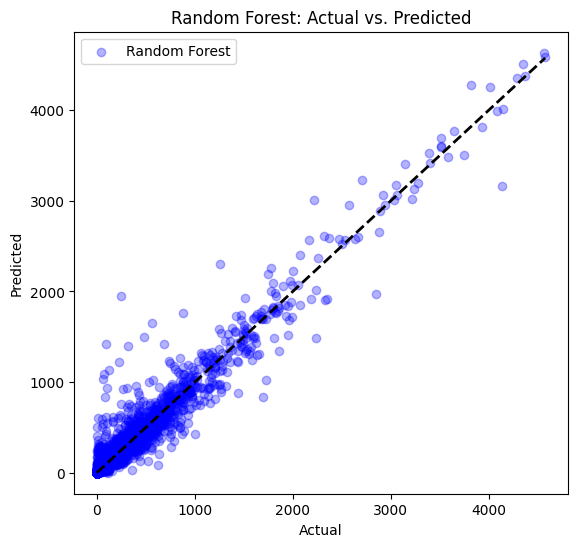

In [19]:
# Plotting Actual vs. Predicted Values for both models

plt.figure(figsize=(14, 6))

# Random Forest predictions
plt.subplot(1, 2, 1)
plt.scatter(y_valid, y_pred_rf, alpha=0.3, color='blue', label='Random Forest')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend()
plt.show()

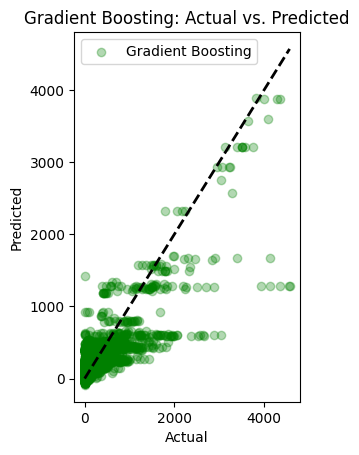

In [20]:
# Gradient Boosting predictions
plt.subplot(1, 2, 2)
plt.scatter(y_valid, y_pred_gb, alpha=0.3, color='green', label='Gradient Boosting')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--k', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.legend()
plt.show()